## AI-HUB 데이터 확인

## 📊 df_fixed 라벨 정리 및 균형 조정 요약   

### 1. 상황 (owner_situation_fused) 라벨 정리

- 기존 상황 라벨 `기타` → owner 감정과 조합해 `감정_기타` 형태로 의미 보강  
- 클래스 불균형 존재   

| 주요 클래스          | 소수 클래스(유지/보류)           | 제거 대상/통합 권장  |
|---------------------|-------------------------------|-------------------|
| 휴식/편안           | 화남/불쾌_기타, 불안/공포_기타    | 위생관리, 분리/고립    |
| 놀이/자극           | 공격성_기타                    |                   |
| 편안/안정_기타       |                               |                   |
| 행복/즐거움_기타     |                               |                   |
| 돌아옴/재회         |                               |                   |
| 낯선 상황/불안       |                               |                   |
| 싫은 자극/처벌       |                               |                   |
   

### 2. 감정 (cat_emotion_fused) 라벨

- 감정 라벨 `불안/슬픔` + `공포` 통합 → `불안/공포`  
- 총 5개 감정 라벨 유지  
- 클래스 불균형은 **클래스 가중치 적용** 또는 소수 감정 데이터 증강 고민 가능

In [1]:
import pandas as pd

# CSV 파일 불러오기
df = pd.read_csv('./data/final_total_dataset.csv')

# meta_json 개수 (전체 파일 수)
print("== meta_json 개수 (전체 파일 수) ==")
print(len(df['meta_json'].unique()))
print()

# number of frames 통계
print("== number of frames 통계 ==")
print(df['number of frames'].describe())
print()

# cat_action 분포 및 유니크 개수
print("== cat_action 분포 ==")
print(df['cat_action'].value_counts())
print(f"🐾 cat_action 라벨 개수: {df['cat_action'].nunique()}")
print()

# cat_emotion 분포 및 유니크 개수
print("== cat_emotion 분포 ==")
print(df['cat_emotion'].value_counts())
print(f"❤️cat_emotion 라벨 개수: {df['cat_emotion'].nunique()}")
print()

# owner_situation 분포 및 유니크 개수
print("== owner_situation 분포 ==")
print(df['owner_situation'].value_counts())
print(f"🏠 owner_situation 라벨 개수: {df['owner_situation'].nunique()}")
print()

== meta_json 개수 (전체 파일 수) ==
8976

== number of frames 통계 ==
count    8976.000000
mean       92.937054
std         8.806401
min        80.000000
25%        85.000000
50%        92.000000
75%       100.000000
max       110.000000
Name: number of frames, dtype: float64

== cat_action 분포 ==
cat_action
꼬리를 흔드는 동작           1947
걷거나 달리는 동작           1410
앞발을 뻗어 휘적거리는 동작      1174
옆으로 눕는 동작            1059
발을 숨기고 웅크리고 앉는 동작     942
납작 엎드리는 동작            669
배를 보여주는 동작            538
머리를 들이대는 동작           472
앞발로 꾹꾹 누르는 동작         443
좌우로 뒹구는 동작            322
Name: count, dtype: int64
🐾 cat_action 라벨 개수: 10

== cat_emotion 분포 ==
cat_emotion
편안/안정     6085
행복/즐거움    1785
공격성        592
화남/불쾌      345
불안/공포      169
Name: count, dtype: int64
❤️cat_emotion 라벨 개수: 5

== owner_situation 분포 ==
owner_situation
휴식/편안        3179
놀이/자극        2829
편안/안정_기타     1191
행복/즐거움_기타     587
돌아옴/재회        565
낯선 상황/불안      212
싫은 자극/처벌      172
화남/불쾌_기타      102
불안/공포_기타       49
위생관리           38
공격성_기타     

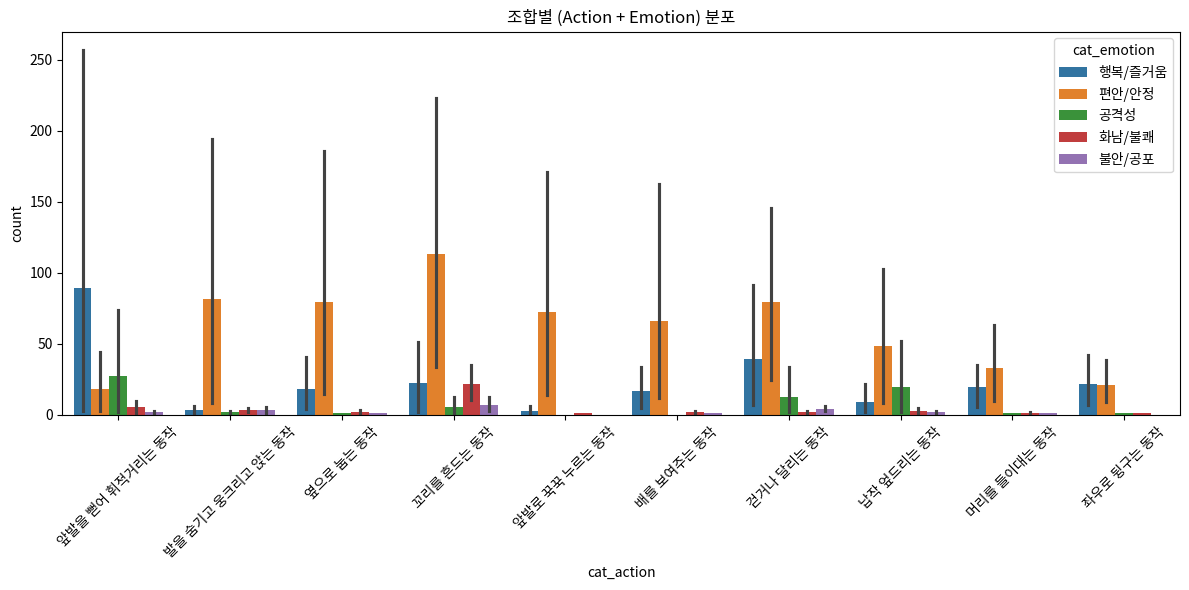

In [2]:
group_counts = (
    df.groupby(["cat_action", "cat_emotion", "owner_situation"])
    .size()
    .reset_index(name="count")
    .sort_values(by="count", ascending=False)
)

# print(group_counts.head(10))  # 상위 10개 조합 출력

pivot = df.pivot_table(
    index="cat_action", columns="cat_emotion", values="meta_json", aggfunc="count", fill_value=0
)
# print(pivot)

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import warnings

# matplotlib findfont 경고 끄기
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")
warnings.filterwarnings("ignore", message="findfont: Font family .* not found")

# NotoSansCJK 폰트 경로 지정
font_path = '/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc'
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(12, 6))
sns.barplot(
    data=group_counts,
    x="cat_action",
    y="count",
    hue="cat_emotion"
)
plt.xticks(rotation=45)
plt.title("조합별 (Action + Emotion) 분포")
plt.tight_layout()
plt.show()



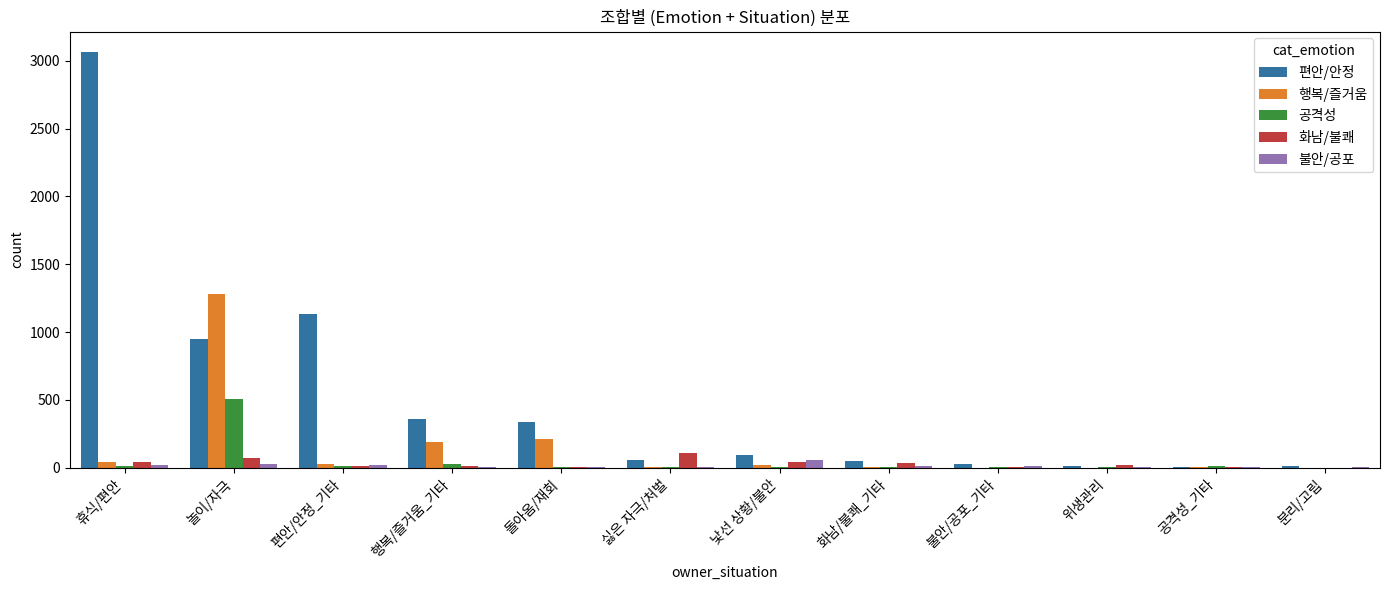

In [3]:
group_emotion_situation = (
    df.groupby(["cat_emotion", "owner_situation"])
    .size()
    .reset_index(name="count")
    .sort_values(by="count", ascending=False)
)

plt.figure(figsize=(14, 6))
sns.barplot(
    data=group_emotion_situation,
    x="owner_situation",
    y="count",
    hue="cat_emotion"
)
plt.xticks(rotation=45, ha='right')
plt.title("조합별 (Emotion + Situation) 분포")
plt.tight_layout()
plt.show()


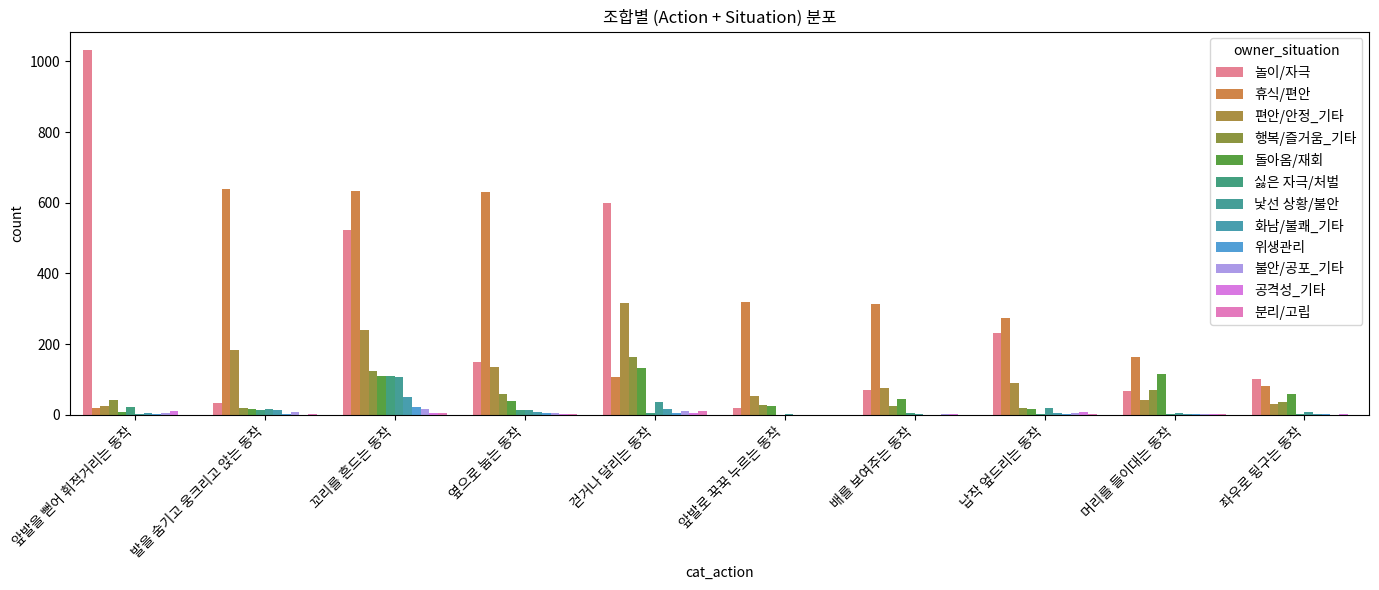

In [4]:
group_action_situation = (
    df.groupby(["cat_action", "owner_situation"])
    .size()
    .reset_index(name="count")
    .sort_values(by="count", ascending=False)
)

plt.figure(figsize=(14, 6))
sns.barplot(
    data=group_action_situation,
    x="cat_action",
    y="count",
    hue="owner_situation"
)
plt.xticks(rotation=45, ha='right')
plt.title("조합별 (Action + Situation) 분포")
plt.tight_layout()
plt.show()


In [5]:
print("🎯 상위 15개 라벨 조합 (Action + Emotion + Situation):\n")
print(group_counts.head(15))


🎯 상위 15개 라벨 조합 (Action + Emotion + Situation):

            cat_action cat_emotion owner_situation  count
226    앞발을 뻗어 휘적거리는 동작      행복/즐거움           놀이/자극    673
171  발을 숨기고 웅크리고 앉는 동작       편안/안정           휴식/편안    628
254          옆으로 눕는 동작       편안/안정           휴식/편안    627
74          꼬리를 흔드는 동작       편안/안정           휴식/편안    586
200      앞발로 꾹꾹 누르는 동작       편안/안정           휴식/편안    318
186         배를 보여주는 동작       편안/안정           휴식/편안    308
19          걷거나 달리는 동작       편안/안정           놀이/자극    308
25          걷거나 달리는 동작       편안/안정        편안/안정_기타    298
65          꼬리를 흔드는 동작       편안/안정           놀이/자극    294
119         납작 엎드리는 동작       편안/안정           휴식/편안    266
207    앞발을 뻗어 휘적거리는 동작         공격성           놀이/자극    259
71          꼬리를 흔드는 동작       편안/안정        편안/안정_기타    224
30          걷거나 달리는 동작      행복/즐거움           놀이/자극    208
168  발을 숨기고 웅크리고 앉는 동작       편안/안정        편안/안정_기타    182
143        머리를 들이대는 동작       편안/안정           휴식/편안    153


In [6]:
# 유니크한 (cat_action, cat_emotion, owner_situation) 조합 개수
unique_combinations = group_counts.shape[0]
print(f"🎯 유니크한 조합 개수: {unique_combinations}개")


🎯 유니크한 조합 개수: 282개


In [7]:
# 조합별 샘플 수의 통계
print("📊 조합별 샘플 수 통계 (group_counts['count'].describe()):\n")
print(group_counts['count'].describe())


📊 조합별 샘플 수 통계 (group_counts['count'].describe()):

count    282.000000
mean      31.829787
std       89.641910
min        1.000000
25%        1.000000
50%        4.000000
75%       18.000000
max      673.000000
Name: count, dtype: float64


In [8]:
min_count = group_counts['count'].min()
max_count = group_counts['count'].max()

print(f"🔻 최소 샘플 수 조합:\n{group_counts[group_counts['count'] == min_count]}")
print(f"\n🔺 최대 샘플 수 조합:\n{group_counts[group_counts['count'] == max_count]}")


🔻 최소 샘플 수 조합:
          cat_action cat_emotion owner_situation  count
261        옆으로 눕는 동작       화남/불쾌          돌아옴/재회      1
214  앞발을 뻗어 휘적거리는 동작         공격성        화남/불쾌_기타      1
217  앞발을 뻗어 휘적거리는 동작       불안/공포        불안/공포_기타      1
218  앞발을 뻗어 휘적거리는 동작       편안/안정          공격성_기타      1
225  앞발을 뻗어 휘적거리는 동작      행복/즐거움        낯선 상황/불안      1
..               ...         ...             ...    ...
279       좌우로 뒹구는 동작      행복/즐거움        화남/불쾌_기타      1
40        걷거나 달리는 동작       화남/불쾌            위생관리      1
16        걷거나 달리는 동작       불안/공포           휴식/편안      1
232  앞발을 뻗어 휘적거리는 동작       화남/불쾌          공격성_기타      1
233  앞발을 뻗어 휘적거리는 동작       화남/불쾌        낯선 상황/불안      1

[80 rows x 4 columns]

🔺 최대 샘플 수 조합:
          cat_action cat_emotion owner_situation  count
226  앞발을 뻗어 휘적거리는 동작      행복/즐거움           놀이/자극    673


In [9]:
print("🏆 상위 10개 조합:")
print(group_counts.head(10))

print("\n🐾 하위 10개 조합:")
print(group_counts.tail(10))


🏆 상위 10개 조합:
            cat_action cat_emotion owner_situation  count
226    앞발을 뻗어 휘적거리는 동작      행복/즐거움           놀이/자극    673
171  발을 숨기고 웅크리고 앉는 동작       편안/안정           휴식/편안    628
254          옆으로 눕는 동작       편안/안정           휴식/편안    627
74          꼬리를 흔드는 동작       편안/안정           휴식/편안    586
200      앞발로 꾹꾹 누르는 동작       편안/안정           휴식/편안    318
186         배를 보여주는 동작       편안/안정           휴식/편안    308
19          걷거나 달리는 동작       편안/안정           놀이/자극    308
25          걷거나 달리는 동작       편안/안정        편안/안정_기타    298
65          꼬리를 흔드는 동작       편안/안정           놀이/자극    294
119         납작 엎드리는 동작       편안/안정           휴식/편안    266

🐾 하위 10개 조합:
          cat_action cat_emotion owner_situation  count
7         걷거나 달리는 동작       불안/공포          공격성_기타      1
273       좌우로 뒹구는 동작      행복/즐거움          공격성_기타      1
281       좌우로 뒹구는 동작       화남/불쾌            위생관리      1
4         걷거나 달리는 동작         공격성            위생관리      1
1         걷거나 달리는 동작         공격성        낯선 상황/불안      1

> 멀티 태스크용으로 라벨 불균형 어떡하지

---

In [11]:
# 조합 빈도 집계
emotion_situation_counts = (
    df
    .groupby(["cat_emotion", "owner_situation"])
    .size()
    .reset_index(name="count")
    .sort_values(by="count", ascending=False)
)

print("🎯 Emotion + Situation 조합 상위:")
print(emotion_situation_counts.head(10))  # 상위 10개 확인


🎯 Emotion + Situation 조합 상위:
   cat_emotion owner_situation  count
34       편안/안정           휴식/편안   3063
37      행복/즐거움           놀이/자극   1283
31       편안/안정        편안/안정_기타   1130
25       편안/안정           놀이/자극    948
2          공격성           놀이/자극    503
32       편안/안정       행복/즐거움_기타    357
26       편안/안정          돌아옴/재회    340
38      행복/즐거움          돌아옴/재회    210
43      행복/즐거움       행복/즐거움_기타    187
52       화남/불쾌        싫은 자극/처벌    108


In [13]:
print(emotion_situation_counts['count'].describe())

count      58.000000
mean      154.758621
std       467.064191
min         1.000000
25%         6.000000
50%        14.000000
75%        46.500000
max      3063.000000
Name: count, dtype: float64


---

### 전략 : 언더샘플링   
- 무작위 샘플링의 경우, 다양성이 부족한 데이터가 남을 수 있음   
   - ex) 고양이가 많이 출현하지 않음/ 고양이 크기다 왔다갔다함/ etc   
> 그렇다면, 샘플링 전에 고양이가 실제로 얼마나 존재하는지 빈도를 기록하느 칼럼 추가하기(meta)    
> 하위 샘플도 상위 샘플도 모두 진행하기    